# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

Defaulting to user installation because normal site-packages is not writeable
  Using cached citipy-0.0.6-py3-none-any.whl
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#^^^
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | quatre cocos
Processing Record 5 of Set 1 | kingscliff
Processing Record 6 of Set 1 | taltal
Processing Record 7 of Set 1 | south hedland
Processing Record 8 of Set 1 | tsengel
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | east ballina
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | woolgoolga
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | novo aripuana
Processing Record 19 of Set 1 | miyaly
Processing Record 20 of Set 1 | belmonte
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | college
Pr

Processing Record 37 of Set 4 | maricopa
Processing Record 38 of Set 4 | santa ana de yacuma
Processing Record 39 of Set 4 | bilibino
Processing Record 40 of Set 4 | weligama
Processing Record 41 of Set 4 | tucuma
Processing Record 42 of Set 4 | ta`u
Processing Record 43 of Set 4 | susuman
Processing Record 44 of Set 4 | kununurra
Processing Record 45 of Set 4 | itoman
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | sao felix do xingu
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | san rafael
Processing Record 1 of Set 5 | afaahiti
Processing Record 2 of Set 5 | newman
Processing Record 3 of Set 5 | fale old settlement
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | weno
Processing Record 6 of Set 5 | jayapura
Processing Record 7 of Set 5 | albufeira
Processing Record 8 of Set 5 | saynshand
Processing Record 9 of Set 5 | port moresby
Processing Record 10 of Set 5 | mbe

Processing Record 29 of Set 8 | gitarama
Processing Record 30 of Set 8 | bengkulu
Processing Record 31 of Set 8 | reichenbach an der fils
Processing Record 32 of Set 8 | kamaishi
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | mar del plata
Processing Record 35 of Set 8 | hammerfest
Processing Record 36 of Set 8 | dasing
Processing Record 37 of Set 8 | dabakala
Processing Record 38 of Set 8 | hithadhoo
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | howard springs
Processing Record 41 of Set 8 | arhavi
Processing Record 42 of Set 8 | kingston
Processing Record 43 of Set 8 | segamat
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | kayangel
Processing Record 46 of Set 8 | notodden
Processing Record 47 of Set 8 | oranjemund
Processing Record 48 of Set 8 | formosa do rio preto
Processing Record 49 of Set 8 | borogontsy
Processing Record 0 of Set 9 | strathdale
Processing Record 1 of Set 9 | volksrust
Processing Record 2

Processing Record 20 of Set 12 | yagry
City not found. Skipping...
Processing Record 21 of Set 12 | port isabel
Processing Record 22 of Set 12 | taungoo
Processing Record 23 of Set 12 | papao
Processing Record 24 of Set 12 | andratx
Processing Record 25 of Set 12 | levuka
Processing Record 26 of Set 12 | mazamari
Processing Record 27 of Set 12 | antofagasta
Processing Record 28 of Set 12 | dassa-zoume
Processing Record 29 of Set 12 | ambon
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | taguatinga
Processing Record 32 of Set 12 | silver city
Processing Record 33 of Set 12 | keflavik
Processing Record 34 of Set 12 | yankton
Processing Record 35 of Set 12 | happy valley-goose bay
Processing Record 36 of Set 12 | villa emilio carranza
Processing Record 37 of Set 12 | konstantinovka
Processing Record 38 of Set 12 | ayorou
Processing Record 39 of Set 12 | manta
Processing Record 40 of Set 12 | selogiri
Processing Record 41 of Set 12 | dzilam gonzalez
Processing Record

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,285.78,74,100,7.64,SH,1697597016
1,grytviken,-54.2811,-36.5092,275.16,88,86,5.39,GS,1697596702
2,fort bragg,35.1390,-79.0060,288.90,85,100,0.00,US,1697597016
3,quatre cocos,-20.2078,57.7625,297.64,85,43,3.04,MU,1697597016
4,kingscliff,-28.2667,153.5667,294.69,77,100,6.17,AU,1697597016


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,285.78,74,100,7.64,SH,1697597016
1,grytviken,-54.2811,-36.5092,275.16,88,86,5.39,GS,1697596702
2,fort bragg,35.1390,-79.0060,288.90,85,100,0.00,US,1697597016
3,quatre cocos,-20.2078,57.7625,297.64,85,43,3.04,MU,1697597016
4,kingscliff,-28.2667,153.5667,294.69,77,100,6.17,AU,1697597016


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

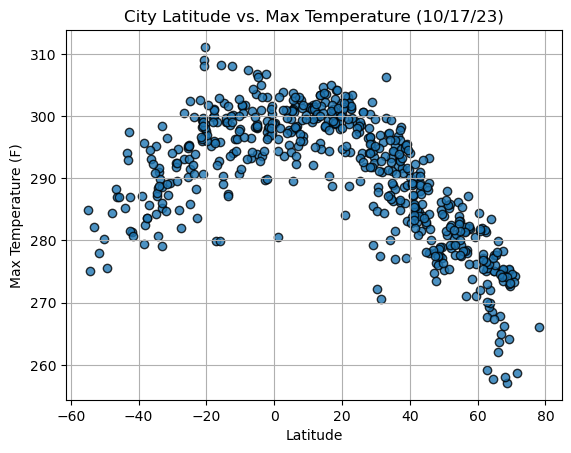

In [16]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

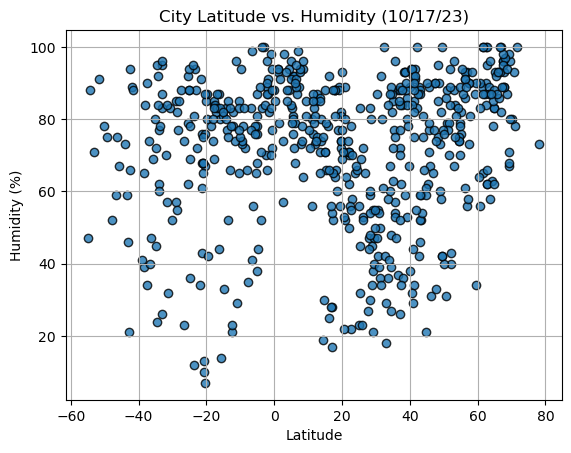

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

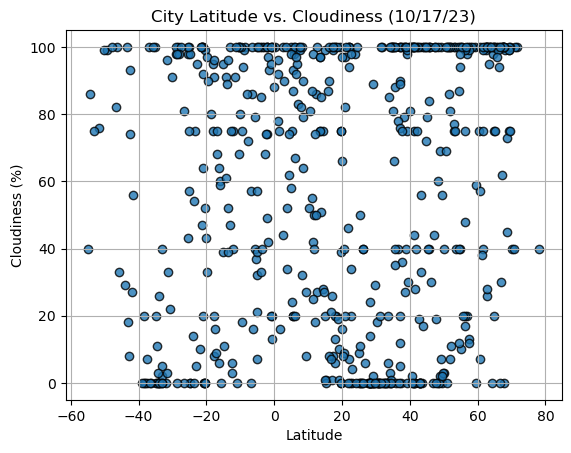

In [18]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

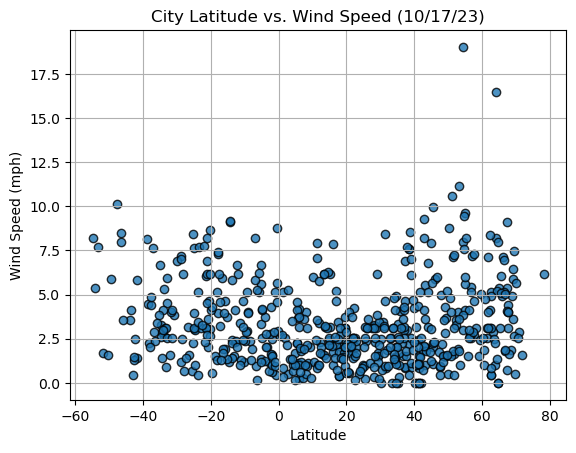

In [19]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
## Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fort bragg,35.1390,-79.0060,288.90,85,100,0.00,US,1697597016
7,tsengel,49.4783,100.8894,278.92,42,56,3.69,MN,1697597017
8,bethel,41.3712,-73.4140,284.40,85,75,1.54,US,1697596712
10,yellowknife,62.4560,-114.3525,275.05,100,100,4.12,CA,1697596711
11,badger,64.8000,-147.5333,275.08,83,100,0.00,US,1697597018


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,285.78,74,100,7.64,SH,1697597016
1,grytviken,-54.2811,-36.5092,275.16,88,86,5.39,GS,1697596702
3,quatre cocos,-20.2078,57.7625,297.64,85,43,3.04,MU,1697597016
4,kingscliff,-28.2667,153.5667,294.69,77,100,6.17,AU,1697597016
5,taltal,-25.4000,-70.4833,290.23,79,98,0.70,CL,1697597017


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7364843931945251


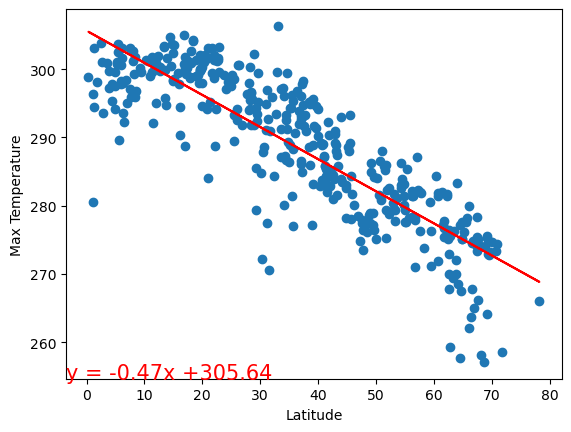

In [22]:
# Define your x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Get the limits of the plot
x_limit = plt.xlim()
y_limit = plt.ylim()

# Annotate the line equation at the bottom left of the plot
plt.annotate(line_eq,(x_limit[0],y_limit[0]),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.4313738414526582


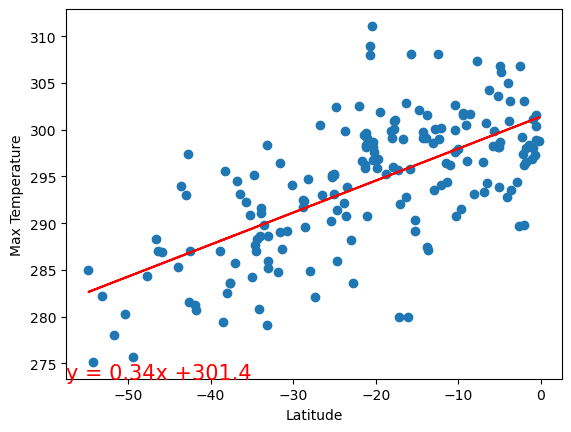

In [23]:
# Define your x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# Get the limits of the plot
x_limit = plt.xlim()
y_limit = plt.ylim()

# Annotate the line equation at the bottom left of the plot
plt.annotate(line_eq,(x_limit[0],y_limit[0]),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In the northern hemisphere there is a negative correlation between the two variables. As latitude increases, temperature decreases. In the southern hemisphere there is a positive corellation between variables. As latitude increases temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02040874416759726


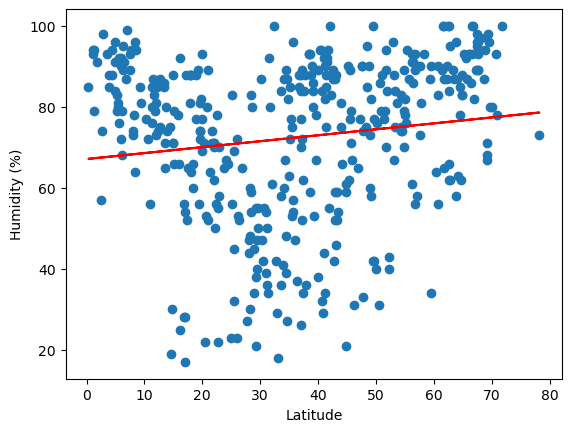

In [24]:
# Define your x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.025658965412512585


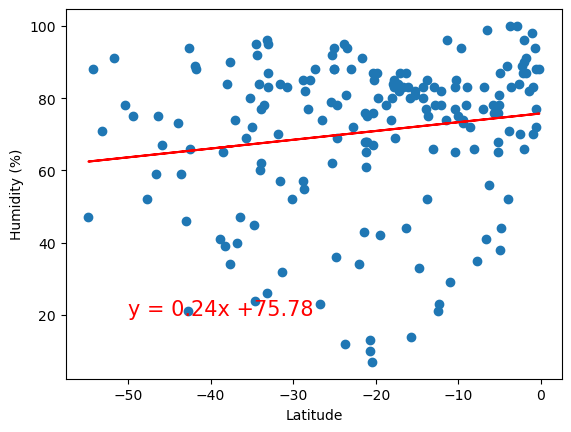

In [25]:
# Define your x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#In both the northern and southern hemispheres there appears to be a positive correlation between humidity and latitude. As latitiude increases so doeso humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0191347015119533


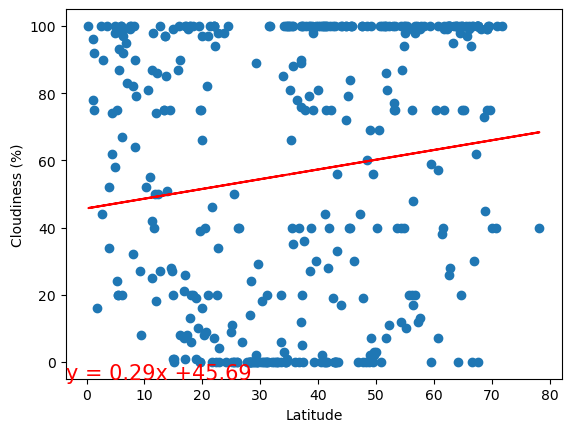

In [26]:
# Define your x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Get the limits of the plot
x_limit = plt.xlim()
y_limit = plt.ylim()

# Annotate the line equation at the bottom left of the plot
plt.annotate(line_eq,(x_limit[0],y_limit[0]),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04183443160217871


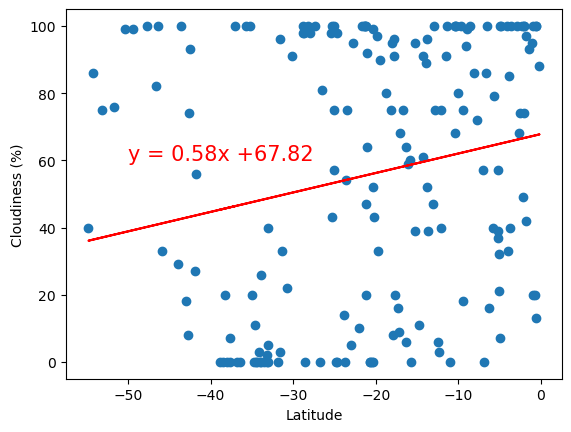

In [27]:
# Define your x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#When it comes to an increasing latitude, the cloudiness had a positive correllation. As humidity and clouds tend to go along with each other. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08332804610054588


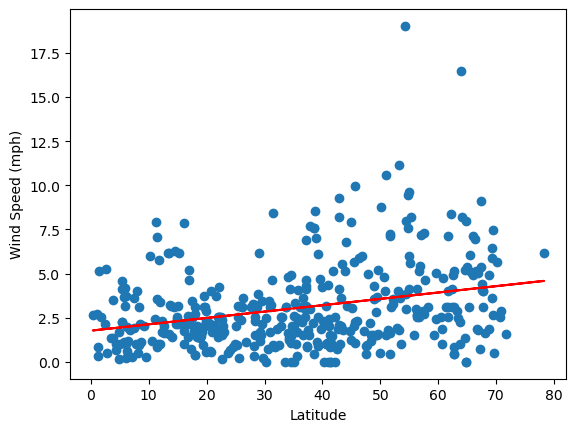

In [28]:
# Define your x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.037331305525748364


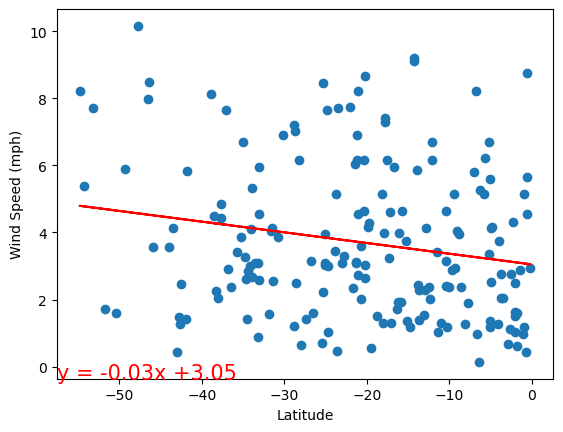

In [29]:
# Define your x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Get the limits of the plot
x_limit = plt.xlim()
y_limit = plt.ylim()

# Annotate the line equation at the bottom left of the plot
plt.annotate(line_eq,(x_limit[0],y_limit[0]),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The wind speeds in the northern hemisphere have a positive correllation. With more humidity and clouds, wind would also be expected. In the southern hemisphere there is a negative correllation. 